**MNIST DIGIT CLASSIFICATION**

In [299]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [300]:
import numpy as np #linear algebra
import pandas as pd #data processing and reading the data
from matplotlib import pyplot as plt #for showing images

In [27]:
!git init
!git add .
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/Ngonidzashe-ux/DigitClassification.git
!git push -u origin main --force

Reinitialized existing Git repository in /kaggle/working/.git/
On branch master

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: refname refs/heads/master not found
fatal: Branch rename failed
fatal: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Ngonidzashe-ux/DigitClassification.git'


In [23]:
!git remote remove origin


In [24]:
!rm -rf .git

In [301]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')#read train.csv into a dataframe which is a tabular data structure with rows and cols

In [302]:
data.head() #head outputs the first 5 rows and each row corresponds to one training example. 28x28 pixel which is 784pixels

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [303]:
#we wanna be working with numpy arrays so we can do linear algebra manipulations
data = np.array(data) #converting the dataframe to an array format
m, n = data.shape #dimensions of the data: m = rows and number of features + 1 as we have the label col
np.random.shuffle(data) #this randomly shuffles the rows of the array

#to prevent overfitting, lets split the data into a training set and cross validation set
#cross validation set. data[0:1000] selects the first 1000 rows in the data array i.e 0 to 999 and transpose the resulting matrix
data_dev = data[0:1000].T
Y_dev = data_dev[0] #This selects row 0 which contains label data
X_dev = data_dev[1:n] #This selects from row 1 to row n-1 and this variable contains feature variables
X_dev = X_dev / 255.



#use the rest of images as training data from row 1000 to row m-1 and transpose that as well.
#data_train = data[1000:m].T
#Y_train = data_train[0] #labels. note each img is represented by a column now. Therefore 7 is the label of the first img in the training data
#X_train = data_train[1:n]
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [304]:
_,m_train = X_train.shape

In [305]:
#just to confirm the number of rows we have as the rows represent the pixels of each image and this should be 784
X_train.shape

(784, 41000)

In [306]:
#Initialize all the paramters. Starting W1,W2, B1 and B2
#rand is used when there is no info about the weight distribution and each value is equally likely
#randn is used when you want most of the values to be centered around 0 and the range is from -0.5 to 0.5
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 #This is gonna generate random values between 0 and 1 to populate the 10 x 784 Weight1 matrix
    b1= np.random.rand(10,1) - 0.5 #Bias1 matrix. Note that random is a module in the np library and we are calling the rand() function of the random module
    W2 = np.random.rand(10, 10) - 0.5 
    b2= np.random.rand(10,1) - 0.5
    return W1, b2, W2, b1
    
    
    

In [307]:
#np.maximum is a Rectified linear activation function: f(x)=max(0,x)
#It applies an element-wise operation to the array Z such that for every element in Z, you compare its value with 0.
#If element > 0, element remains unchanged
#if element < 0, element =0
#This function returns an array
def ReLU(Z):
    return np.maximum(0,Z) 

In [308]:
#np.exp(Z) is an element wise operation that takes the exponational of each element
#This function returns an array with normalized values between 0 and 1 for each entry. This maps a neuron/node/label to a certain probability
#normalize means scaling or transforming data into a specific range
def Softmax(Z):
    exp = np.exp(Z - np.max(Z)) 
    return exp / exp.sum(axis=0)    

In [309]:
#X is the input layer
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1 #
    A1 = ReLU(Z1) #
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1, A1, Z2, A2
    

In [310]:
#We need to one_hot encode all the labels
#np.zeros(x,y) creates an x by y matrix populated by zeros
#Y.max() finds the maximum value in a matrix Y
#Y.size returns the number of elements in matrix Y
#Y is an array consisting of m columns with each entry being a number between 0-9.
#So make an m x 10 matrix with all entries 0
#This is assumed to be a 1D array of categorical labels. These labels are used as column indices in the 2D array one_hot_Y
#np.arange(Y.size): This generates an array of indices from 0 to Y.size - 1. This array represents the row indices of the 2D array one_hot_Y.
#one_hot_Y[np.arange(Y.size), Y]: This syntax performs advanced indexing. It selects elements from one_hot_Y using pairs of row and column indices generated by np.arange(Y.size) and Y.
#= 1: Assigns the value 1 to the selected elements in one_hot_Y. This effectively sets the elements corresponding to the indices specified by the pairs (np.arange(Y.size), Y) to 1.
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y #we flip it because we want each col to be an example instead of each row

In [311]:
#This returns either 1 or 0
#This is just the gradient of the ReLU graph. When x > 0, grad = 1 and when X <= 0, grad = 0
def deriv_ReLU(Z):
    return Z > 0

In [312]:
#Y is the labels
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size #In NumPy, the size attribute of an array returns the total number of elements in the array. If Y is a NumPy array 
    #representing your labels, then m would represent the total number of elements in Y, regardless of its shape.
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2= 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2


In [313]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2    

In [314]:
def get_predictions(A2):
    return np.argmax(A2,0) #A2 consists of probabilities. All entries in each col(training image) are propabilities. The indices represent the classes so the indice with the highest probability is the predicted class.
#np.argmax is used to find the indices of the maximum values along axis 0 (columns) of the array



"""def get_accuracy(predictions, Y):: This line defines a function named get_accuracy that takes two arguments, predictions and Y.
print(predictions, Y): This line prints the predicted classes and the true labels for debugging or monitoring purposes.
return np.sum(predictions == Y) / Y.size: This line calculates the accuracy by comparing the predicted classes (predictions) with the true labels (Y).
It returns the ratio of the number of correct predictions to the total number of samples."""
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X,Y,iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    
    return W1, b1, W2, b2
        
    

In [315]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)


Iteration:  0
[3 8 3 ... 3 3 8] [9 6 0 ... 5 4 6]
Accuracy:  0.14460975609756097
Iteration:  10
[6 8 3 ... 3 9 1] [9 6 0 ... 5 4 6]
Accuracy:  0.22219512195121952
Iteration:  20
[6 8 3 ... 3 9 3] [9 6 0 ... 5 4 6]
Accuracy:  0.2789756097560976
Iteration:  30
[6 8 6 ... 3 9 3] [9 6 0 ... 5 4 6]
Accuracy:  0.3083170731707317
Iteration:  40
[6 8 6 ... 3 9 3] [9 6 0 ... 5 4 6]
Accuracy:  0.33534146341463417
Iteration:  50
[6 8 6 ... 3 9 3] [9 6 0 ... 5 4 6]
Accuracy:  0.36041463414634145
Iteration:  60
[6 8 9 ... 3 9 3] [9 6 0 ... 5 4 6]
Accuracy:  0.38558536585365855
Iteration:  70
[9 3 9 ... 3 9 3] [9 6 0 ... 5 4 6]
Accuracy:  0.4141951219512195
Iteration:  80
[4 3 3 ... 3 4 3] [9 6 0 ... 5 4 6]
Accuracy:  0.45109756097560977
Iteration:  90
[4 3 3 ... 3 4 3] [9 6 0 ... 5 4 6]
Accuracy:  0.49658536585365853
Iteration:  100
[4 3 3 ... 3 4 3] [9 6 0 ... 5 4 6]
Accuracy:  0.530390243902439
Iteration:  110
[9 3 3 ... 8 4 8] [9 6 0 ... 5 4 6]
Accuracy:  0.5545365853658537
Iteration:  120
[9 3 

In [316]:
def make_predictions(X, W1, b1, W2, b2): #We are inputting a DataSet/Array X with the optimized/trained parameters, W1, b1, b2, W2 so we can make predictions
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X) #This just means the we only interested in reusing the output layer which is why we are giving it a variable to store it in
    #Remember that this part is no longer training, we are not gonna do optimization thats why we just want the output. 
    predictions = get_predictions(A2) #Pass the output into get the predictions so that we can view the data nicely without one encoding. remember A2 is one hot encoded and the get predictions is to undo that by returning the indices with max probability along the colums axis thus returning the predicted class
    return predictions


#This function is for testing the prediction to see if it corresponds with the label.
#Remember our training examples are columns in X_TRAIN ARRAY. So the index represents the index of the column which is basically the image we want to test our prediction on
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None] #This line extracts a single column (image) from the training data X_train at the specified index. The None is used to add a new axis, converting it into a column vector.
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2) #makes a prediction by passing the current imnage and the neutral network parameters
    label = Y_train[index] #retrive the label of the current image. Remember, the label will also be in a column in Y train with the same index as the column of the current image in X train
    print("Prediction: ", prediction)#print results
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255 #This line reshapes the column vector back into a 28x28 matrix (assuming it's an image) and scales the pixel values by 255.
    plt.gray()#plt.gray(): This line sets the color map to grayscale for visualization.
    """current_image: This is the image data you want to display. It could be a NumPy array or any other format that Matplotlib can
    interpret as an image.
    interpolation='nearest': This parameter specifies the interpolation method used when displaying the image. Interpolation determines how the 
    pixel values are interpolated to create the visual representation of the image. 'nearest' means that each pixel in the displayed image 
    corresponds directly to a pixel in the input image without blending or smoothing."""
    plt.imshow(current_image, interpolation='nearest') #(imshow) sets up the image for display, 
    plt.show()#critical for rendering the currently active Matplotlib figure on your screen

https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras?cellIds=5&kernelSessionId=47652503


Prediction:  [9]
Label:  9


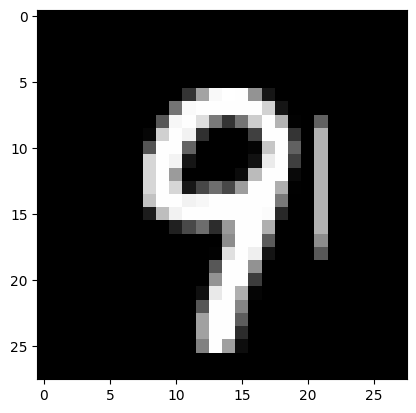

Prediction:  [2]
Label:  6


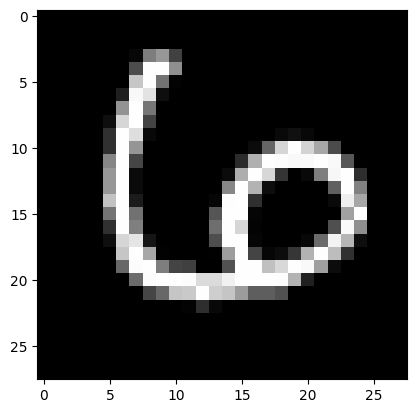

Prediction:  [0]
Label:  0


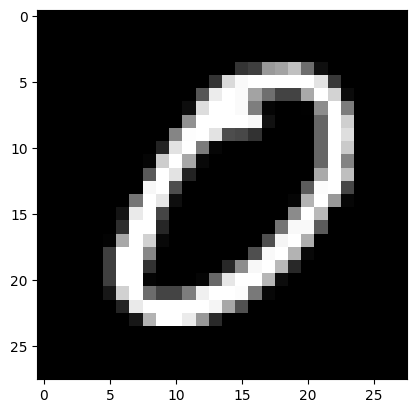

Prediction:  [6]
Label:  6


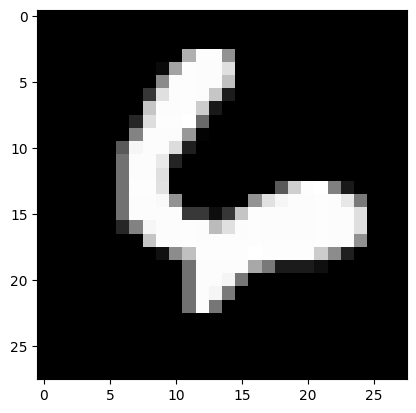

In [317]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [318]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 0 8 0 3 2 1 0 5 4 5 6 6 9 0 2 1 7 2 8 3 4 6 9 7 3 4 3 0 3 7 7 0 4 2 2 6
 8 0 9 4 9 1 4 1 5 5 1 5 8 6 2 8 1 6 4 8 0 6 3 8 3 8 7 0 5 6 1 5 6 3 0 0 7
 3 6 4 0 4 3 6 8 0 7 3 8 0 1 7 6 6 3 4 8 1 3 6 2 6 8 0 2 4 7 8 5 4 6 7 7 7
 8 5 5 3 8 1 0 7 3 6 0 9 3 6 2 3 1 8 3 3 3 9 3 5 1 4 1 8 9 6 3 1 0 1 9 0 8
 8 1 5 9 2 9 4 8 6 1 8 1 4 2 5 9 8 8 6 2 7 9 1 9 4 6 9 2 3 6 5 2 6 8 1 8 2
 3 3 6 0 1 5 3 6 9 9 3 5 6 4 2 8 1 6 1 7 7 1 2 8 2 7 4 2 3 6 8 4 3 4 5 0 2
 2 1 7 0 8 2 1 7 7 3 1 0 7 6 0 5 9 5 9 7 8 4 7 3 8 8 7 0 5 6 6 4 6 9 8 3 5
 7 1 8 2 3 8 3 0 9 4 7 9 8 6 7 8 4 7 8 9 0 6 2 7 6 8 2 6 5 1 4 2 9 0 5 4 7
 1 8 6 1 5 3 8 2 1 8 3 0 1 8 4 4 6 3 2 3 8 2 2 7 8 7 1 3 2 5 6 1 5 3 0 3 9
 4 6 6 2 2 4 2 5 8 4 5 0 6 6 1 8 0 7 0 7 4 2 8 6 5 0 8 9 9 0 2 9 6 8 7 1 8
 0 0 8 6 1 6 8 0 4 1 1 3 1 6 8 5 2 5 9 4 9 1 0 7 9 6 7 5 4 2 9 3 2 6 9 3 1
 2 8 3 0 2 3 2 3 2 1 4 4 7 5 1 7 2 3 9 4 2 5 7 1 2 6 7 4 7 7 4 7 7 2 1 8 4
 7 5 9 4 8 1 9 5 4 9 8 7 2 2 9 8 8 7 0 3 6 2 8 0 7 9 9 6 8 9 6 7 1 0 6 0 8
 8 1 9 3 8 2 2 6 3 4 2 9 

0.804